In [15]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [7]:

# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# Normalize the data from the CSV file
normalized_data = scaler.fit_transform(X=market_data_df)





In [10]:
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [11]:
# Create a DataFrame with the scaled data
normalized_data_df = pd.DataFrame(normalized_data, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data
normalized_data_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [12]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k

for k in k_values:
    # Create a KMeans model with the current k value
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit the model
    kmeans.fit(normalized_data_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)



# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}



# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df.head(10)


c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,53.057788
6,7,44.406791
7,8,37.078233
8,9,32.832187
9,10,28.165433


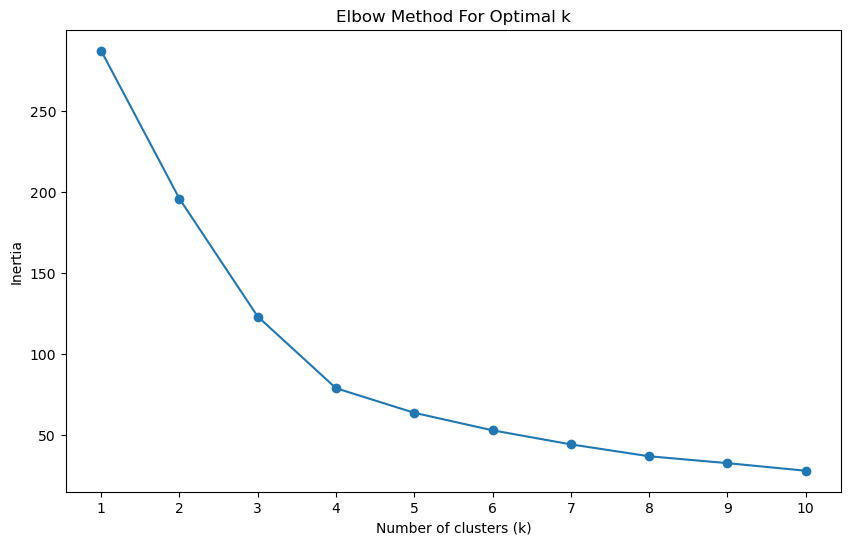

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** the best value for 'k' based on the elbow method would be 4. This is because it is the point just before the reductions in inertia begin to show diminishing returns for each additional cluster, indicating an optimal balance between inertia reduction and cluster count.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [19]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1)


In [20]:
# Fit the K-Means model using the scaled data
kmeans.fit(normalized_data_df)


c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clustered_values = kmeans.predict(normalized_data_df)

# View the resulting array of cluster values.
clustered_values


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [22]:
# Create a copy of the DataFrame
clustered_df = normalized_data_df.copy()


In [26]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["crypto_cluster"] = kmeans.labels_



# Display sample data
clustered_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class,crypto_cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2


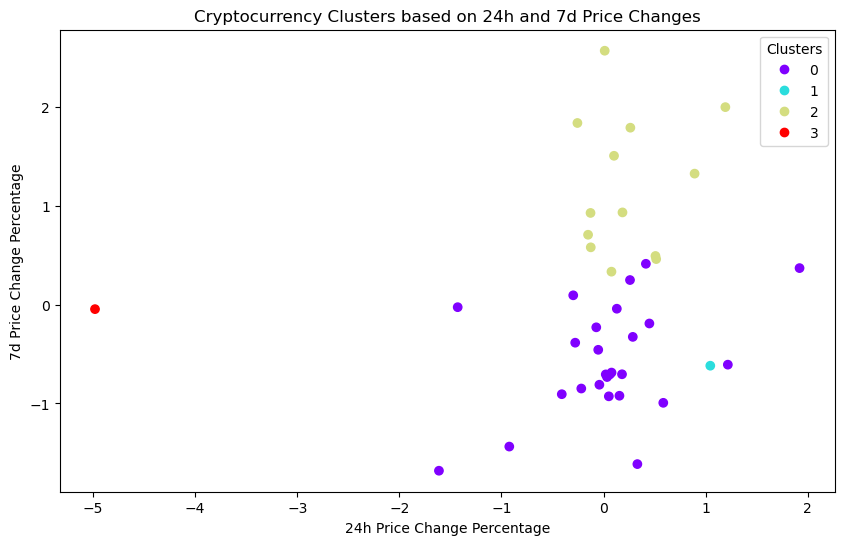

In [27]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(clustered_df["price_change_percentage_24h"], clustered_df["price_change_percentage_7d"], 
                      c=clustered_df["crypto_cluster"], cmap='rainbow')

# Adding title and labels
plt.title('Cryptocurrency Clusters based on 24h and 7d Price Changes')
plt.xlabel('24h Price Change Percentage')
plt.ylabel('7d Price Change Percentage')

# Adding a legend
plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()

### Optimize Clusters with Principal Component Analysis.

In [30]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [31]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(normalized_data_df)


# View the first five rows of the DataFrame. 
crypto_pca[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [33]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 0.895 or 89.5%. This means that these three principal components together capture about 89.5% of the variance in the original scaled dataset, providing a substantial reduction in dimensionality while still retaining a significant amount of the original information.

In [45]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
crypto_pca_df = pd.DataFrame(data=crypto_pca, columns=["PCA 1", "PCA 2", "PCA 3"], index=market_data_df.index)

crypto_pca_df.head(10)




,PCA 1,PCA 2,PCA 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [40]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
for i in k:
    # Create a KMeans model with the current k value
    kmeans = KMeans(n_clusters=i, random_state=1)
    
    # Fit the model
    kmeans.fit(crypto_pca_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df.head(10)


c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,27.720626
6,7,21.145312
7,8,17.208546
8,9,13.719376
9,10,10.559358


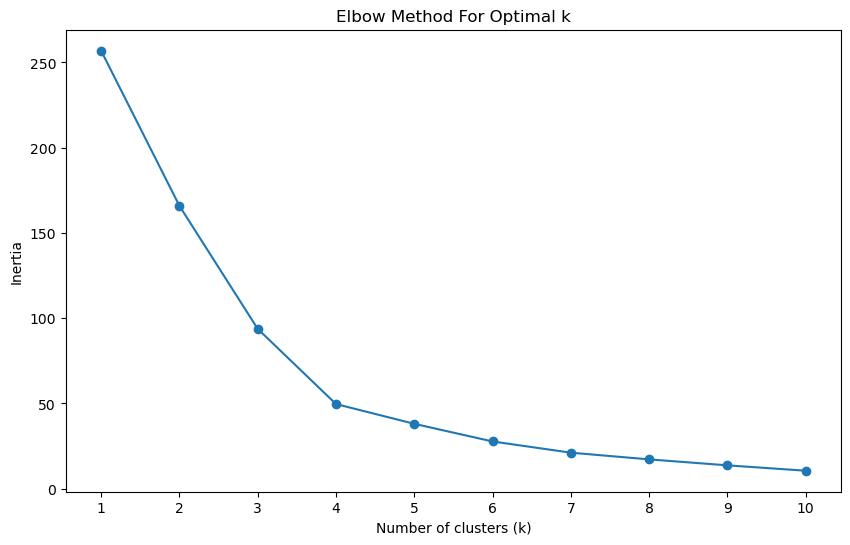

In [41]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(k)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** the best value for'k' appears to be around 5. This is based on the plot's pattern, where the rate of decrease in inertia begins to slow after k=5, making it the point where the elbow could be considered to form. Therefore, k=5 is likely the most balanced choice for the number of clusters, providing a good trade-off between inertia reduction and the complexity of the model.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Comparing this to the best k value found using the original data (which was k=4), it seems there is a slight difference in the optimal 'k' suggested by the PCA-reduced data. The difference could be due to the PCA process condensing the dataset into principal components that capture the most variance in the data, potentially altering the clustering dynamics slightly. The PCA process can sometimes reveal more nuanced structures in the data or simplify the relationships in a way that makes different cluster counts more optimal.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [46]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=1)


In [47]:
# Fit the K-Means model using the PCA data
kmeans.fit(crypto_pca_df)


c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\abeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [48]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clustered_values_pca = kmeans.predict(crypto_pca_df)


# Print the resulting array of cluster values.
clustered_values_pca


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [49]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = crypto_pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df["crypto_cluster"] = kmeans.labels_


# Display sample data
clustered_pca_df.head()


,PCA 1,PCA 2,PCA 3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


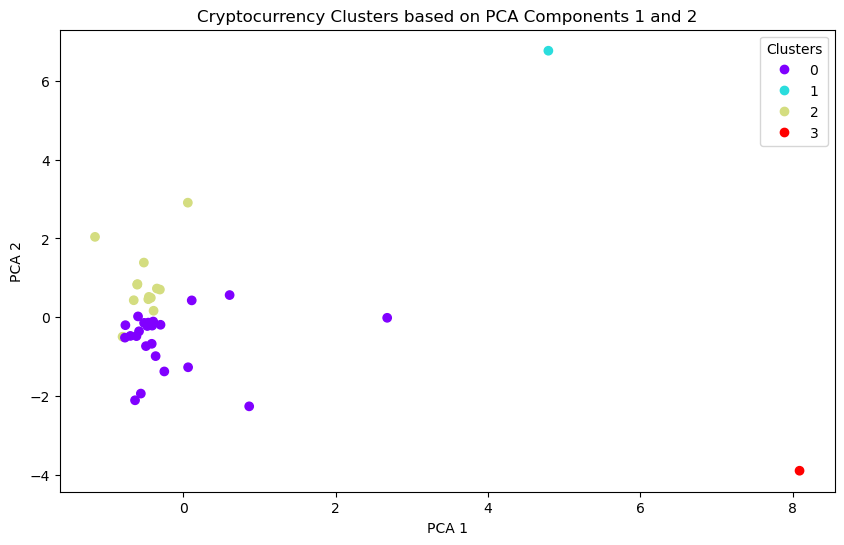

In [50]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(clustered_pca_df['PCA 1'], clustered_pca_df['PCA 2'], c=clustered_pca_df['crypto_cluster'], cmap='rainbow')

# Adding title and labels
plt.title('Cryptocurrency Clusters based on PCA Components 1 and 2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Adding a legend for clusters
plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()





### Determine the Weights of Each Feature on each Principal Component

In [52]:
# Use the columns from the original scaled DataFrame as the index.


# Assuming `normalized_data_df` is your scaled DataFrame and it has been used to fit a PCA model named `pca`
# And assuming `market_data_df` is the original DataFrame before scaling

# Create a DataFrame with the PCA components (the weights)
pca_components_df = pd.DataFrame(
    data=pca.components_,
    columns=normalized_data_df.columns,
    index=[f"PCA {i+1}" for i in range(pca.n_components_)]
)

# Display the DataFrame
print(pca_components_df)





       price_change_percentage_24h  price_change_percentage_7d  \
PCA 1                    -0.416728                   -0.102432   
PCA 2                     0.358162                    0.227432   
PCA 3                    -0.218795                    0.787670   

       price_change_percentage_14d  price_change_percentage_30d  \
PCA 1                    -0.009162                     0.191523   
PCA 2                     0.540415                     0.562182   
PCA 3                     0.349534                    -0.181744   

       price_change_percentage_60d  price_change_percentage_200d  \
PCA 1                     0.320365                      0.594468   
PCA 2                     0.434040                      0.027735   
PCA 3                    -0.361377                      0.039733   

       price_change_percentage_1y  
PCA 1                    0.568379  
PCA 2                   -0.150789  
PCA 3                    0.210541  


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PCA 1 seems to capture more of the long-term trends, PCA 2 is influenced by medium-term price changes, and PCA 3 is most affected by short to medium-term price changes, especially the 7-day changes.
    